# Otoczka wypukła

In [1]:
import numpy as np
import pandas as pd
from bitalg.tests.test2 import Test
from bitalg.visualizer.main import Visualizer

### Przykładowe zastosowanie narzędzia do wizualizacji

In [2]:
def draw_example_1():
    vis = Visualizer()

    # point = (x, y)
    points = [
        (-62.781083483620016, 9.295526540248986),
        (-10.543100198806997, -26.080520917553812),
        (-81.64932184252287, -74.42163273030921),
        (-36.297317058417946, -72.91194239793609),
        (37.795092197502356, 57.71110085986143),
        (62.511149567563905, -29.172821102708937),
        (21.82806671019955, 2.647377124715007),
        (-46.24539555503924, 42.65521594922478),
        (-77.92302295134137, -7.666110427206263),
        (25.85862324263843, 62.49564419388622),
        (-27.71649622636616, -67.33453457840331),
        (94.83039177581244, -55.52473300629532),
        (-26.29675918891381, -51.30150933048958),
        (-70.11654929355294, 16.723865705806816),
        (26.682887992598097, -65.55763984116587),
        (57.03377667841906, -55.56635171240132),
        (-16.053624841650247, -42.333295668531456),
        (-56.810858686395505, -37.41219002465095),
        (15.604076302407279, -24.85779870929437),
        (-71.77261869976445, -12.306083264402673),
    ]
    # line_segment = ((x1, y1), (x2, y2))
    line_segments = [
        ((-81.64932184252287, -74.42163273030921), (-36.297317058417946, -72.91194239793609)),
        ((-36.297317058417946, -72.91194239793609), (26.682887992598097, -65.55763984116587)),
        ((26.682887992598097, -65.55763984116587), (94.83039177581244, -55.52473300629532)),
        ((94.83039177581244, -55.52473300629532), (37.795092197502356, 57.71110085986143)),
        ((37.795092197502356, 57.71110085986143), (25.85862324263843, 62.49564419388622)),
        ((25.85862324263843, 62.49564419388622), (-46.24539555503924, 42.65521594922478)),
        ((-46.24539555503924, 42.65521594922478), (-70.11654929355294, 16.723865705806816)),
        ((-70.11654929355294, 16.723865705806816), (-77.92302295134137, -7.666110427206263)),
        ((-77.92302295134137, -7.666110427206263), (-81.64932184252287, -74.42163273030921)),
    ]
    vis.add_point(points, color="green")
    vis.add_line_segment(line_segments, color="blue")
    vis.show()

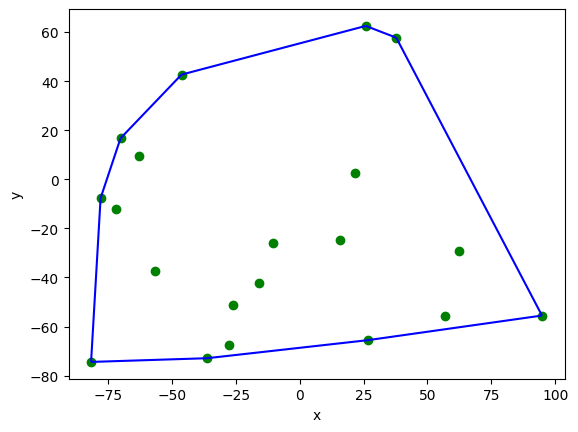

In [3]:
draw_example_1()

### Wprowadzenie

Czym jest otoczka wypukła?  
Podzbiór płaszczyzny $Q$ nazywamy wypukłym iff, gdy dla dowolnej pary punktów $p, q \in Q$ odcinek $\overline{pq}$ jest całkowicie zawarty w $Q$.  
Otoczka wypukła $\mathcal{CH}(Q)$ zbioru $Q$ jest najmniejszym wypukłym zbiorem zawierającym $Q$.

### Zastosowania otoczku wypukłej

Otoczki wypukłe - w szczególności otoczki wypukłe w przestrzeni trójwymiarowej - są spotykane w różnych zastosowaniach. Na przykład używa się ich do przyspieszania wykrywania kolizji w animacji komputerowej. Przepuśćmy, że chcemy sprawdzić, czy dwa obiekty $\mathcal{P_1}$ i $\mathcal{P_2}$ przecinają się. Jeśli przez większość czasu odpowiedź na to pytanie jest negatywna, to opłaca się następująca strategia. Przybliżamy obiekty przez prostrze obiekty $\widehat{\mathcal{P_1}}$ i $\widehat{\mathcal{P_2}}$, które zawierały orginały. Jeśli chcemy sprwadzić, czy $\mathcal{P_1}$ i $\mathcal{P_2}$ przecinają się, najpierw sprawdzamy, czy przecinają się $\widehat{\mathcal{P_1}}$ i $\widehat{\mathcal{P_2}}$. Jeśli występuje ten przypadek, to powinniśmy wykonać test na orginalnych obiektach, który jest przepuszczalnie znacznie kosztowniejszy.  
Sprawdzanie przecięcia otoczek wypukłych jest bardziej skomplikowane niż dla sfer - choć mimo to łatwiejsze niż dla obiektów niewypukłych - ale otoczki wypukłe mogą dużo lepiej przybliżać większość obiektów.

## Generowanie losowych punktów na płaszczyźnie 

Zapoznaliśmy się i wiemy jak generowac losowe punkty na płaszczyźnie z laboratorium I (współrzędne rzeczywiste typu *double* - podwójna precyzja obliczeń). Przygotuj zestawy punktów, które będzie można użyć jako testowe dla algorytmów obliczania otoczki wypukłej.

Uzupełnij funkcję ```generate_uniform_points```.

In [4]:
def generate_uniform_points(left=-100, right=100, n=100):
    
    import random
    
    points=[]
    for i in range(n):
        points.append((random.uniform(left,right),random.uniform(left,right)))
    
    return points
    raise Exception("Unimplemented")

<span style="color:red">Ćw.</span> Wygeneruj $100$ losowych punktów w przestrzeni 2D o współrzędnych z przedziału $x \in \langle -100,100 \rangle$ oraz $y \in \langle -100,100\rangle$.

In [5]:
points_a = generate_uniform_points(-100, 100, 100)

Zwizualizuj wygenerowane punkty.

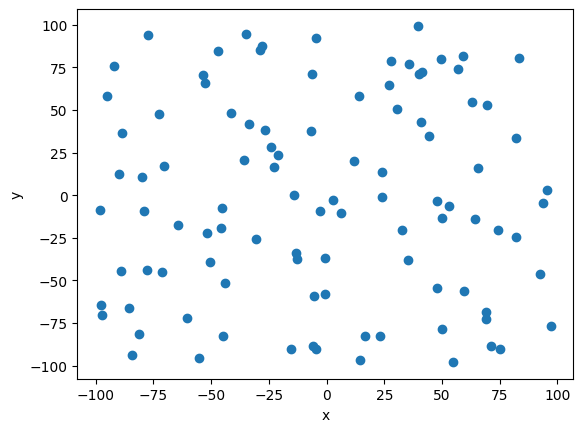

In [6]:
# visualize(points_a)
vis = Visualizer()
vis.add_point(points_a)
vis.show()

Uzupełnij funkcję ```generate_circle_points```.

In [7]:
def generate_circle_points(O, R, n=100):
    
    import random
    points=[]
    xk,yk=O
    znak=1
    for i in range(n):
        alpha = 2 * np.pi * random.uniform(0, 1)
        x = R * np.cos(alpha) + xk
        y = R * np.sin(alpha) + yk
        points.append((x,y))
        
    return points
    raise Exception("Unimplemented")

<span style="color:red">Ćw.</span> Wygeneruj $100$ losowych punktów w przestrzeni 2D leżących na okręgu o środku $O = (0,0)$ i promieniu $R = 10$.

In [8]:
points_b = generate_circle_points((0, 0), 10, 100)

Zwizualizuj wygenerowane punkty.

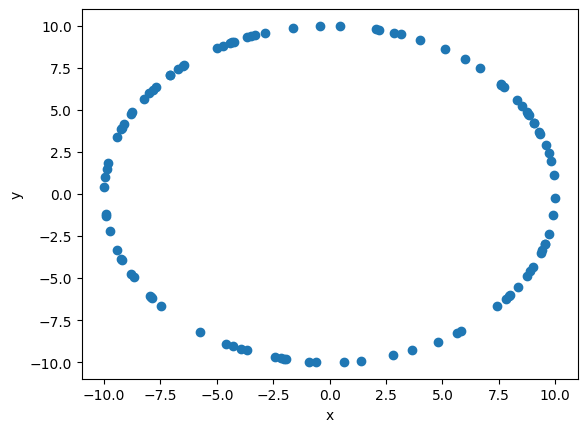

In [9]:
# visualize(points_b)
vis.clear()
vis.add_point(points_b)
vis.show()

Jak można było zauważyć, to funkcje ```generate_uniform_points``` oraz ```generate_circle_points``` są takie same jak w laboratorium I.

Uzupełnij funkcję ```generate_rectangle_points```.

In [10]:
import random
def generate_on_section(a,b):
    if a[0]>b[0]:
        a,b=b,a
    ax,ay=a
    bx,by=b
    if ax==bx:
        hight=random.uniform(ay,by)
        return (ax,hight)
    else:
        const=((ay+by+(-ax-bx)*(by-ay)/(bx-ax))/2)
        val=random.uniform(ax,bx)
        hight=val*(by-ay)/(bx-ax) + const
        return (val,hight)


def generate_rectangle_points(a=(-10, -10), b=(10, -10), c=(10, 10), d=(-10, 10), n=100):
    points=[]
    for i in range(n):
        case=random.randint(0,3)
        if case==0:
            points.append(generate_on_section(a,b))
        if case==1:
            points.append(generate_on_section(a,d))    
        if case==2:
            points.append(generate_on_section(b,c))    
        if case==3:
            points.append(generate_on_section(c,d))
    
    return points
    raise Exception("Unimplemented")


<span style="color:red">Ćw.</span> Wygeneruj $100$ losowych punktów w przestrzeni 2D leżących na obwodzie prostokąta, którego wyznaczają wierzchołki
$(-10,-10), (10,-10), (10,10)$ oraz $(-10,10)$.

In [11]:
points_c = generate_rectangle_points(
    (-10, -10), (10, -10), (10, 10), (-10, 10), 100)

Zwizualizuj wygenerowane punkty.

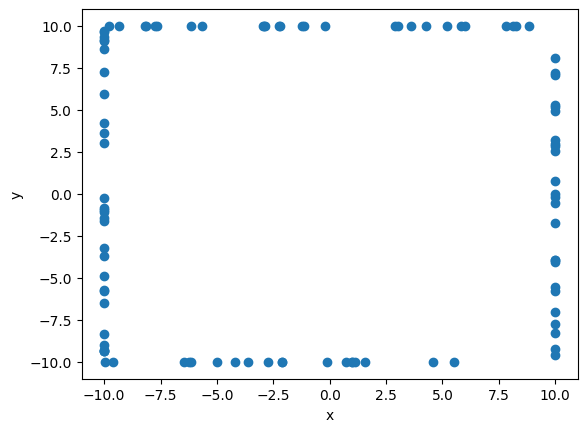

In [12]:
# visualize(points_c)
vis.clear()
vis.add_point(points_c)
vis.show()

Uzupełnij funkcję ```generate_square_points```.

In [13]:
import random
def generate_on_section(a,b):
    if a[0]>b[0]:
        a,b=b,a
    ax,ay=a
    bx,by=b
    if ax==bx:
        if ay>by:
            ay,by=by,ay
        hight=random.uniform(ay,by)
        return (ax,hight)
    else:
        const=((ay+by+(-ax-bx)*(by-ay)/(bx-ax))/2)
        val=random.uniform(ax,bx)
        hight=val*(by-ay)/(bx-ax) + const
#         print(a,b,"  ", (val,hight), const)
        return (val,hight)

def generate_square_points(a=(0, 0), b=(10, 0), c=(10, 10), d=(0, 10),
                           axis_n=25, diag_n=20):
    points=[a,b,c,d]
    for i in range(axis_n):
        points.append(generate_on_section(a,b))
        points.append(generate_on_section(a,d))
    for i in range(diag_n):
        points.append(generate_on_section(a,c))
        points.append(generate_on_section(b,d))
    return points
    
    raise Exception("Unimplemented")

<span style="color:red">Ćw.</span> Wygeneruj losowe punktów w przestrzeni 2D w następujący sposób: po 25 punktów na dwóch bokach kwadratu leżących na osiach i po 20 punktów na przekątnych kwadratu, zawierający punkty wyznaczające kwadrat $(0, 0), (10, 0), (10, 10)$ oraz $(0, 10)$.

In [14]:
points_d = generate_square_points(
    (0, 0), (10, 0), (10, 10), (0, 10), 25, 20)

Zwizualizuj wygenerowane punkty.

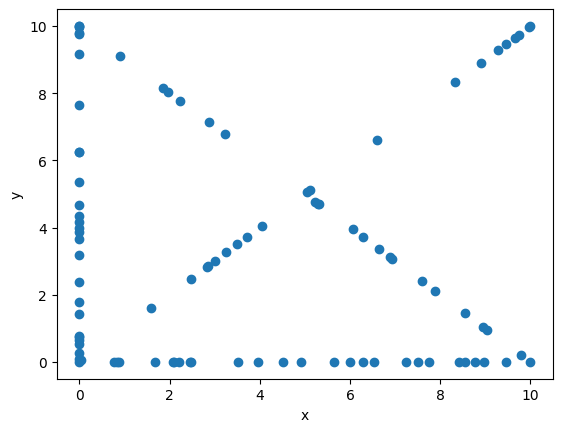

In [15]:
# visualize(points_d)
vis.clear()
vis.add_point(points_d)
vis.show()

## Algorytm Grahama oraz algorytm Jarvisa

Po przygotowaniu przykładowych zbiorów danych i ich zwizualizowaniu, chcemy zobaczyć jak buduje się dla nich otoczka wypukła z wykorzystaniem różnych algortymów.  
W tych dwóch algorytmach potrzebna będzie funkcja którą już dobrze znamy, czyli funkcja, która sprawdza po której stornie prostej znajduje się punkt.  
Dla każdego algorytmu trzeba będzie zaimplementować dwie funkcje obliczające otoczkę wypukłę, ze względu, że jedna z nich będzie miała możliwość wyświetlania kroków postępowania w algorytmie. Druga funkcja będzie uzyteczna do porównywania czasów dla różnych zbiorów danych i względęm algorytmów.  
W graficznej funkcji danego algorytmu, jednym kolorem powinny być zaznaczone wszystkie punkty zbioru wyjściowego, drugim kolorem boki aktualne rozpatrywane, a trzecim boki wielokąta otoczki. Po zakończeniu wyznaczania otoczki, wierzchołki otoczki powinny być wyróżnione (osobnym kolorem bądź kształtem).  

### Algorytm Grahama

Algorytm Grahama tworzy otoczkę wypukłą poprzez utrzymywanie stosu $S$, w którym znajdują się punkty, które mogą, ale nie muszą tworzyć otoczki wypukłej. Za każdym razem jest wstawiany na stos (push) jeden punkt z zbioru punktów $Q$ i jest on usuwany ze stosu (pop), jeżeli nie jest punktem $\mathcal{CH}(Q)$. Kiedy algorytm kończy się, stos $S$ zawiera tylko punkty otoczki wypukłej $\mathcal{CH}(Q)$ w kierunku przeciwnym do ruchu wskazówek zegera.

---

Procedura $\mathtt{Graham-Build(Q)}$ przyjmuje zbiór punktów $Q$, gdzie $|Q| \geq 3$. Wywołuje ona funkcję $\mathtt{TOP(S)}$, która zwraca punkt z góry stosu bez zmieniania $S$ oraz
$\mathtt{NEXT-TO-TOP(S)}$, która zwraca punkt ponieżej góry stosu $S$, bez zmieniania stosu. Funkcja $\mathtt{PUSH(p, S)}$ wstawia punkt $p$ na stos $S$. Funkcja $\mathtt{POP(p, S)}$ usuwa punkt $p$ ze stosu $S$.

$\mathtt{Graham-Build(Q)}$  
1)  niech $p_0$ będzie punktem w zbiorze Q z najmniejszą współrzędną $y$,  
    oraz najmniejszą współrzędną $x$ w przypadku, gdy wiele punktów ma tą samą współrzędną $x$  
    
2)  nich $\mathtt{\langle p_1, p_2, \dots, p_m \rangle}$ będzie pozostałym zbiorem punktów w $Q$ posortowanym  
    zgodnie z przeciwnym ruchem wskazówek zegara wokół punktu $p_0$  
    (jeżeli więcej niż jeden punkt ma ten sam kąt to usuwamy wszystkie punkty  
     z wyjątkiem tego najbardziej oddalonego od $p_0$)  
3) stwórz pusty stos $S$  
4) $\mathtt{PUSH(p_0, S)}$
5) $\mathtt{PUSH(p_1, S)}$
6) $\mathtt{PUSH(p_2, S)}$
7) **for** $i = 3$ **to** m  
8) &emsp;**while** kąt utworzony przez $\mathtt{NEXT-TO-TOP(S)}$, $\mathtt{TOP(S)}$ oraz $p_i$ tworzy lewostronny skręt
9) &emsp;&emsp;$\mathtt{POP(S)}$
10) &emsp;$\mathtt{PUSH(p_i, S)}$
11) **return** $S$


---

Lewostronny skręt oznacza, że dla trzech kolejnych punktów $a, b, c$, punkt $b$ leży po lewej stronie prostej $ac$.  
  

<span style="color:red">Ćw.</span> Uzupełnij funkcję ```graham_algorithm```, która oblicza otoczkę wypukłą korzystając z algorytmu Grahama.

In [18]:
from functools import cmp_to_key
import copy


def mat_det_2x2(a, b, c):
    ax,ay=a
    bx,by=b
    cx,cy=c
    return (ax-cx)*(by-cy)-(bx-cx)*(ay-cy)


def orientation(p0, p1, p2, e=0):
    val = mat_det_2x2(p0, p1, p2)
    if val > e:
        return 1
    if val < -e:
        return -1
    return 0


def distSq(p1, p2):
    return (p2[0] - p1[0]) ** 2 + (p2[1] - p1[1]) ** 2


def co_remove(Q):
    S = [Q[0]]
    if len(Q)<3:
        return Q
    for i in range(1, len(Q) - 1):
        if orientation(Q[0], Q[i], Q[i + 1]) != 0:
            S.append(Q[i])
    S.append(Q[-1])
    return S


def graham_algorithm(Q):
    points = copy.deepcopy(Q)
    p0 = (float('inf'), float('inf'))
    index = 0
    for i in range(len(points)):
        if points[i][1] < p0[1] or (points[i][1] == p0[1] and points[i][0] < p0[0]):
            p0 = points[i]
            index = i

    points[index], points[0] = points[0], points[index]
    sorted_points = [p0]

    def compare(a, b):
        nonlocal p0
        ori = orientation(p0, a, b)
        if ori == 0:
            if distSq(p0, b) >= distSq(p0, a):
                return -1
            else:
                return 1
        else:
            return -ori

    sorted_points += sorted(points[1:], key=cmp_to_key(compare))
    sorted_points = co_remove(sorted_points)
    m = len(sorted_points)
    if m < 3:
        return sorted_points

    S = []
    S.append(sorted_points[0])
    S.append(sorted_points[1])
    S.append(sorted_points[2])

    for i in range(3, m):
        while orientation(S[-2], S[-1], sorted_points[i],0) != 1 and len(S)>1:
            S.pop()
        S.append(sorted_points[i])
        

    return S
    
    raise Exception("Unimplemented")

# def mat_det_3x3(a, b, c):
    
#     ax,ay=a
#     bx,by=b
#     cx,cy=c
#     return ax*by+ay*cx+bx*cy-cx*by-cy*ax-bx*ay


# def delete_collinear_points(points):
#     new_points = [points[0]] # points[0] to x0
#     for i in range(1, len(points)-1):
#         if orient(new_points[-1], points[i], points[i+1]) != 0:
#             new_points.append(points[i])
#     if len(points)>1:
#         new_points.append(points[-1])
#     return new_points

# def distance(a, b):
#     return ((b[1]-a[1])**2 + (b[0]-a[0])**2)**(1/2)

def orient(a, b, c, e=0):
    det = mat_det_2x2(a, b, c)
    if det>e:
        return 1
    if det<-e:
        return -1
    return 0

# def graham_algorithm(Q):
#     '''
#     Funkcja buduje otoczkę wypukłą dla podanego
#     zbioru punktów Q algorymem Grahama
#     :parm Q: zbiór punktów
#     :return: tablica punktów w postaci krotek współrzędnych
#     '''

#     def compare(a, b):
#         nonlocal x0
#         if orient(x0, a, b) == 0:
#             if distance(x0, a) < distance(x0, b):
#                 return -1
#             return 1
#         return orient(x0, a, b) * (-1)

#     x0 = min(Q, key=lambda point: (point[1], point[0]))
#     sorted_points = sorted(Q, key = cmp_to_key(compare))
#     points = delete_collinear_points(sorted_points)

#     if len(points) <= 3:
#         return points

#     convex_hull = points[:3] # initializing convex

#     for i in range(3, len(points)):
#         while orient(convex_hull[-2], convex_hull[-1], points[i]) != 1 and len(convex_hull)>2: # deleting middle point
#             convex_hull.pop()
#         convex_hull.append(points[i])

#     return convex_hull


Przetestuj swoją implementacje algorytmu Grahama, by sprawdzić czy poprawnie obliczana jest otoczka.

In [19]:
Test().runtest(1, graham_algorithm)

Lab 2, task 1:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
	Test 4: Passed
	Test 5: Passed
	Test 6: Passed
	Test 7: Passed
	Test 8: Passed
	Test 9: Passed
	Test 10: Passed
	Test 11: Passed
Result: 11/11
Time: 8.828s


<span style="color:red">Ćw.</span> Uzupełnij funkcję ```graham_algorithm_draw```, która oblicza otoczkę wypukłą korzystając z algorytmu Grahama z dodatkową opcją wyświetlania kroków algorytmu.

In [ ]:
def graham_algorithm_draw(Q):
    
    from functools import cmp_to_key
import copy


def mat_det_2x2(a, b, c):
    ax,ay=a
    bx,by=b
    cx,cy=c
    return (ax-cx)*(by-cy)-(bx-cx)*(ay-cy)


def orientation(p0, p1, p2, e=0):
    val = mat_det_2x2(p0, p1, p2)
    if val > e:
        return 1
    if val < -e:
        return -1
    return 0


def distSq(p1, p2):
    return (p2[0] - p1[0]) ** 2 + (p2[1] - p1[1]) ** 2


def co_remove(Q):
    S = [Q[0]]
    if len(Q)<3:
        return Q
    for i in range(1, len(Q) - 1):
        if orientation(Q[0], Q[i], Q[i + 1]) != 0:
            S.append(Q[i])
    S.append(Q[-1])
    return S


def graham_algorithm_draw(Q):
    vis.clear()
    vis.add_point(Q)
    points = copy.deepcopy(Q)
    p0 = (float('inf'), float('inf'))
    index = 0
    for i in range(len(points)):
        if points[i][1] < p0[1] or (points[i][1] == p0[1] and points[i][0] < p0[0]):
            p0 = points[i]
            index = i
    vis.add_point(p0,color='yellow')

    points[index], points[0] = points[0], points[index]
    sorted_points = [p0]

    def compare(a, b):
        nonlocal p0
        ori = orientation(p0, a, b)
        if ori == 0:
            if distSq(p0, b) >= distSq(p0, a):
                return -1
            else:
                return 1
        else:
            return -ori

    sorted_points += sorted(points[1:], key=cmp_to_key(compare))
    sorted_points = co_remove(sorted_points)
    m = len(sorted_points)
    if m < 3:
        return sorted_points

    S = []
    S.append(sorted_points[0])
    vis.add_point(sorted_points[0],color='yellow')
    S.append(sorted_points[1])
    vis.add_point(sorted_points[1],color='yellow')
    S.append(sorted_points[2])
    vis.add_point(sorted_points[2],color='yellow')

    for i in range(3, m):
        while orientation(S[-2], S[-1], sorted_points[i],0) != 1 and len(S)>2:
            vis.add_point(S[-1],color='black')
            S.pop()
        S.append(sorted_points[i])
        vis.add_point(sorted_points[i],color='yellow')

    edges=[(S[i],S[i+1]) for i in range(len(S)-1)]
    edges.append((S[len(S)-1],S[0]))
    

    for e in edges:
        vis.add_line_segment(e,color='red')

    return S, vis

    raise Exception("Unimplemented")

Zwizualizuj swoją implementację algorytmu.

Zbiór danych A

In [ ]:
graham_points_a, vis_graham_a = graham_algorithm_draw(points_a)

In [ ]:
vis.show_gif(interval=200)

In [ ]:
# visualize(graham_points_a)
vis.clear()
vis.add_point(points_a)
vis.add_line_segment([(graham_points_a[i], graham_points_a[i+1]) for i in range(len(graham_points_a)-1)])
vis.add_line_segment([graham_points_a[-1], graham_points_a[0]])
vis.show()

Zbiór danych B

In [ ]:
graham_points_b, vis_graham_b = graham_algorithm_draw(points_b)

In [ ]:
vis_graham_b.show_gif()

In [ ]:
# visualize(graham_points_b)
vis.clear()
vis.add_point(points_b)
vis.add_line_segment([(graham_points_b[i], graham_points_b[i+1]) for i in range(len(graham_points_b)-1)])
vis.add_line_segment([graham_points_b[-1], graham_points_b[0]])
vis.show()

Zbiór danych C

In [ ]:
graham_points_c, vis_graham_c = graham_algorithm_draw(points_c)

In [ ]:
vis_graham_c.show_gif()

In [ ]:
# visualize(graham_points_c)
vis.clear()
vis.add_point(points_c)
vis.add_line_segment([(graham_points_c[i], graham_points_c[i+1]) for i in range(len(graham_points_c)-1)])
vis.add_line_segment([graham_points_c[-1], graham_points_c[0]])
vis.show()

Zbiór danych D

In [ ]:
graham_points_d, vis_graham_d = graham_algorithm_draw(points_d)

In [ ]:
vis_graham_d.show_gif()

In [ ]:
# visualize(graham_points_d)
vis.clear()
vis.add_point(points_d)
vis.add_line_segment([(graham_points_d[i], graham_points_d[i+1]) for i in range(len(graham_points_d)-1)])
vis.add_line_segment([graham_points_d[-1], graham_points_d[0]])
vis.show()

### Algorytm Jarvisa

Algorytm Jarvisa oblicza otoczkę wypukłą dla zbioru punktów $Q$ przez technikę zwaną owijaniem paczki (*package wrapping*) lub owijaniem prezentu (*gift wrapping*). Algorytm Jarvisa buduje sekwencję $H = \langle p_1, p_2, \dots, p_m \rangle$ będącą wierzchołkami $\mathcal{CH}(Q)$. Zaczynamy od punktu $p_0$, następny punkt $p_1$ w otoczce wypukłej ma najmniejszy kąt w odniesieniu do $p_0$ (w przypadku takiego samego kąta - wybiera się punkt najdalej od $p_0$). Podobnie, gdy $p_2$ ma najmniejszy kąt w odniesieniu do $p_1$, itd.. Zauważyć warto, że możemy tym sposobem obliczyć lewy i prawy łańcuch otoczki wypukłej $\mathcal{CH}(Q)$. Lewy łańcuch buduje się podobnie. Gdy osiągniemy najwyższy wierzchołej w prawym łańcuchu $p_k$, wybieramy wierzchołek $p_{k+1}$, który ma najmniejszy kąt w odniesieniu do $p_k$, ale od ujemnej osi-$x$. Można zaimplementować algorytm Jarvisa bez konstruowania pomocniczych łańcuchów - lewego i prawego. Taka implementacja utrzymuje śledzenie kąta ostatniej strony otoczki wypukłej i wymaga sekwencji kątów boków otoczki tylko rosnącej. (Patrząc na trzy ostatnie punkty jesteśmy w stanie obliczyć jaki punkt należy włączyć do $\mathcal{CH}(Q)$ w zależności od budowanego punktu)

<span style="color:red">Ćw.</span> Uzupełnij funkcję ```jarvis_algorithm```, która oblicza otoczkę wypukłą korzystając z algorytmu Jarvisa.

In [20]:
from functools import cmp_to_key
import copy


def mat_det_2x2(a, b, c):
    ax,ay=a
    bx,by=b
    cx,cy=c
    return (ax-cx)*(by-cy)-(bx-cx)*(ay-cy)


def orientation(p0, p1, p2, e=0):
    val = mat_det_2x2(p0, p1, p2)
    if val > e:
        return 1
    if val < -e:
        return -1
    return 0

def distSq(p1, p2):
    return (p2[0] - p1[0]) ** 2 + (p2[1] - p1[1]) ** 2



def jarvis_algorithm(Q):
    points = copy.deepcopy(Q)
    p0 = (float('inf'), float('inf'))
    index = 0
    for i in range(len(points)):
        if points[i][1] < p0[1] or (points[i][1] == p0[1] and points[i][0] < p0[0]):
            p0 = points[i]
            index = i
    
    l = index
    result = []
    result.append(p0)
    while (True):
        q = (l + 1) % len(points)
        for i in range(len(points)):
            if i == l:
                continue
            d = orientation(points[l], points[i], points[q])
            if d > 0 or (d == 0 and distSq(points[i], points[l]) > distSq(points[q], points[l])):
                q = i
        l = q
        if l == index:
            break
        result.append(points[q])

    return result

        
    raise Exception("Unimplemented")

Przetestuj swoją implementacje algorytmu Jarvisa, by sprawdzić czy poprawnie obliczana jest otoczka.

In [21]:
Test().runtest(2, jarvis_algorithm)

Lab 2, task 2:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
	Test 4: Passed
	Test 5: Passed
	Test 6: Passed
	Test 7: Passed
	Test 8: Passed
	Test 9: Passed
	Test 10: Passed
	Test 11: Passed
Result: 11/11
Time: 6.156s


<span style="color:red">Ćw.</span> Uzupełnij funkcję ```jarvis_algorithm_draw```, która oblicza otoczkę wypukłą korzystając z algorytmu Jarvisa z dodatkową opcją wyświetlania kroków algorytmu.

In [49]:
# from functools import cmp_to_key
# import copy


# def mat_det_2x2(a, b, c):
#     ax,ay=a
#     bx,by=b
#     cx,cy=c
#     return (ax-cx)*(by-cy)-(bx-cx)*(ay-cy)


# def orientation(p0, p1, p2, e=0):
#     val = mat_det_2x2(p0, p1, p2)
#     if val > e:
#         return 1
#     if val < -e:
#         return -1
#     return 0

# def distSq(p1, p2):
#     return (p2[0] - p1[0]) ** 2 + (p2[1] - p1[1]) ** 2



# def jarvis_algorithm_draw(Q):
#     vis.clear()
#     vis.add_point(Q)
#     points = copy.deepcopy(Q)
#     p0 = (float('inf'), float('inf'))
#     index = 0
#     for i in range(len(points)):
#         if points[i][1] < p0[1] or (points[i][1] == p0[1] and points[i][0] < p0[0]):
#             p0 = points[i]
#             index = i
    
#     l = index
#     S = []
#     S.append(p0)
#     vis.add_point(p0,color='yellow')
#     while (True):
#         q = (l + 1) % len(points)
#         for i in range(len(points)):
#             if i == l:
#                 continue
#             d = orientation(points[l], points[i], points[q])
#             if d > 0 or (d == 0 and distSq(points[i], points[l]) > distSq(points[q], points[l])):
#                 q = i
#         l = q
#         if l == index:
#             break
#         S.append(points[q])
#         vis.add_point(points[q],color='yellow')
#         vis.add_line_segment((S[-2],S[-1]),color='red')
        
#     vis.add_line_segment((S[-1],S[0]),color='red')
    


#     return S, vis

#     raise Exception("Unimplemented")

def jarvis_algorithm_draw(Q):
    '''
    Funkcja buduje otoczkę wypukłą dla podanego
    zbioru punktów Q algorymem Jarvisa
    :parm Q: zbiór punktów
    :return: tablica punktów w postaci krotek współrzędnych
    '''

    vis = Visualizer()

    vis.add_point(Q)

    if len(Q) < 4:
        return [(x, y) for x, y in Q]

    idx0, x0 = min(enumerate(Q), key=lambda point: (point[1][1], point[1][0]))
    vis.add_point(x0, color='orange')

    convex_hull = [x0]
    last = x0
    last_idx = idx0

    while True:
        point_idx = (last_idx + 1) % len(Q)
        point = Q[point_idx]
        for i in range(len(Q)):
            if i != last_idx:
                ori = orient(last, Q[i], point)
                if ori > 0 or (ori == 0 and distance(Q[i], last) > distance(point, last)):
                    point_idx = i
                    point = Q[i]
#         last = Q[last_idx]
#         convex_hull.append(last)
#         vis.add_point(last, color='orange')
        last_idx=point_idx
        if last_idx == idx0:
            break
            
        last = Q[last_idx]
        convex_hull.append(last)
        vis.add_point(last, color='orange')


    edges = [(convex_hull[i], convex_hull[i+1]) for i in range(len(convex_hull)-1)]
    edges.append((convex_hull[-1],convex_hull[0]))

    for e in edges:
        vis.add_line_segment(e, color='red')

#     convex_hull.pop()

    return convex_hull, vis




Zwizualizuj swoją implementację algorytmu.

Zbiór danych A

In [50]:
jarvis_points_a, vis_jarvis_a = jarvis_algorithm_draw(points_a)

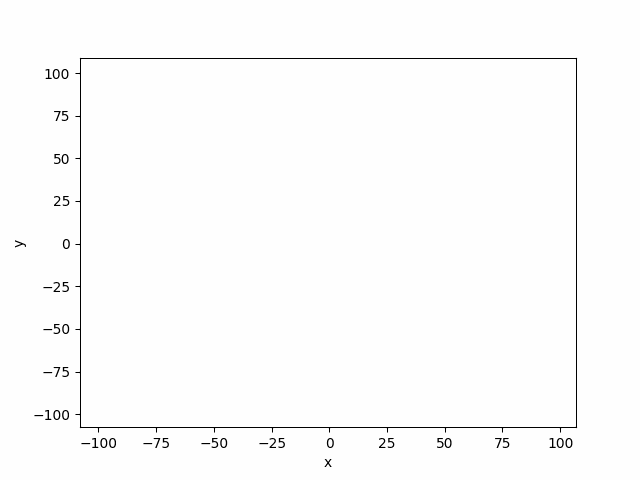

In [51]:
vis_jarvis_a.show_gif()

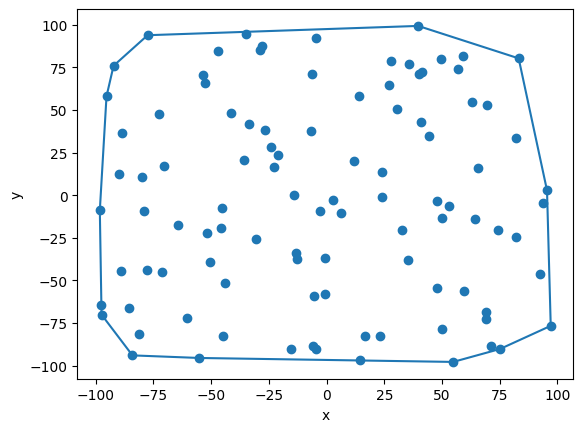

In [52]:
# visualize(jarvis_points_a)
vis.clear()
vis.add_point(points_a)
vis.add_line_segment([(jarvis_points_a[i], jarvis_points_a[i+1]) for i in range(len(jarvis_points_a)-1)])
vis.add_line_segment([jarvis_points_a[-1], jarvis_points_a[0]])
vis.show()

Zbiór danych B

In [59]:
jarvis_points_b, vis_jarvis_b = jarvis_algorithm_draw(points_b)

In [ ]:
vis_jarvis_b.show_gif()

In [ ]:
# visualize(jarvis_points_b)
vis.clear()
vis.add_point(points_b)
vis.add_line_segment([(jarvis_points_b[i], jarvis_points_b[i+1]) for i in range(len(jarvis_points_b)-1)])
vis.add_line_segment([jarvis_points_b[-1], jarvis_points_b[0]])
vis.show()

Zbiór danych C

In [56]:
jarvis_points_c, vis_jarvis_c = jarvis_algorithm_draw(points_c)

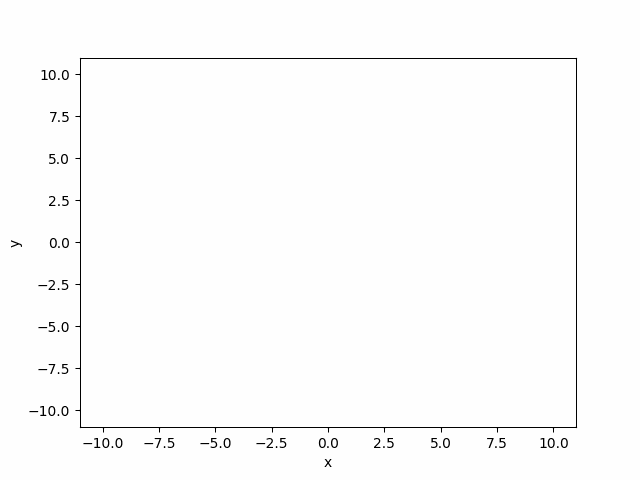

In [57]:
vis_jarvis_c.show_gif()

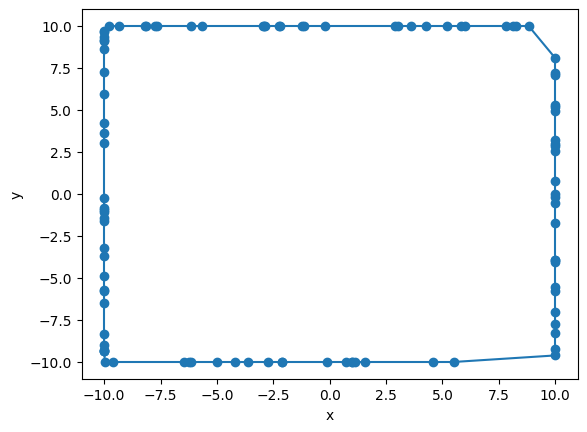

In [58]:
# visualize(jarvis_points_c)
vis.clear()
vis.add_point(points_c)
vis.add_line_segment([(jarvis_points_c[i], jarvis_points_c[i+1]) for i in range(len(jarvis_points_c)-1)])
vis.add_line_segment([jarvis_points_c[-1], jarvis_points_c[0]])
vis.show()

Zbiór danych D

In [53]:
jarvis_points_d, vis_jarvis_d = jarvis_algorithm_draw(points_d)

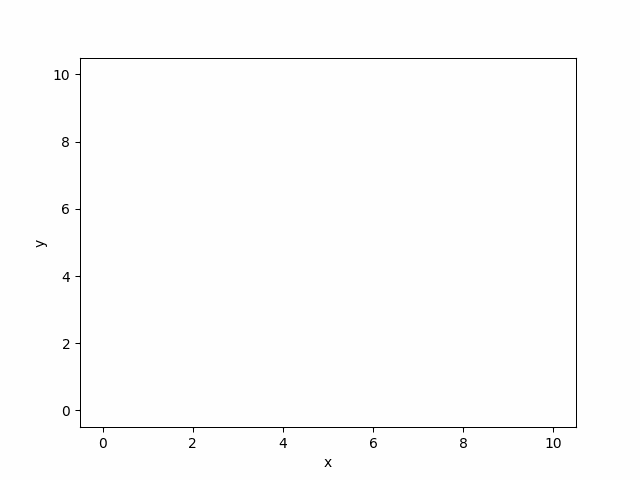

In [54]:
vis_jarvis_d.show_gif()

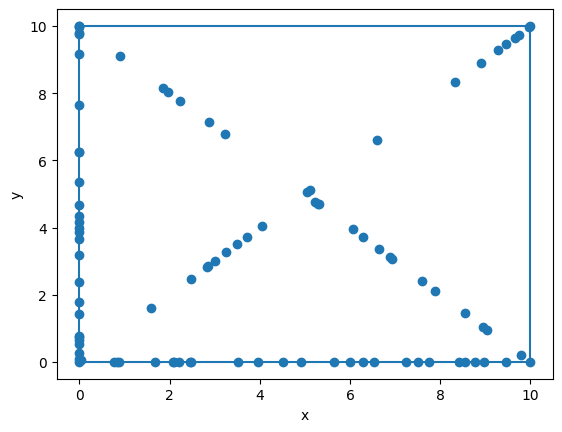

In [55]:
# visualize(jarvis_points_d)
vis.clear()
vis.add_point(points_d)
vis.add_line_segment([(jarvis_points_d[i], jarvis_points_d[i+1]) for i in range(len(jarvis_points_d)-1)])
vis.add_line_segment([jarvis_points_d[-1], jarvis_points_d[0]])
vis.show()


---

Po zobaczeniu i przetestowaniu wstępnie zbiorów danych, przyszła kolej na porównanie czasów działania dla różnych danych. Do tego potrzebujemy bardziej miarodajnych zbiorów danych.  
<span style="color:red">Ćw.</span> Stwórz zmodyfikowane zbiory danych A, B, C oraz D - tak jak uważasz za słuszne.

In [ ]:
# prepare your data to time-test
point_a_x10 = generate_uniform_points(-100, 100, 1000)
point_a_x50 = generate_uniform_points(-100, 100, 5000)
point_a_x100 = generate_uniform_points(-100, 100, 10000)
point_a_x1000 = generate_uniform_points(-100, 100, 100000)
point_b_x10=generate_circle_points((0, 0), 10, 1000)
point_b_x50=generate_circle_points((0, 0), 10, 5000)
point_b_x100=generate_circle_points((0, 0), 10, 10000)
point_b_x1000=generate_circle_points((0, 0), 10, 100000)
point_c_x10=generate_rectangle_points((-10, -10), (10, -10), (10, 10), (-10, 10), 1000)
point_c_x50=generate_rectangle_points((-10, -10), (10, -10), (10, 10), (-10, 10), 5000)
point_c_x100=generate_rectangle_points((-10, -10), (10, -10), (10, 10), (-10, 10), 10000)
point_c_x1000=generate_rectangle_points((-10, -10), (10, -10), (10, 10), (-10, 10), 100000)
point_d_x10= generate_square_points((0, 0), (10, 0), (10, 10), (0, 10), 250, 200)
point_d_x50= generate_square_points((0, 0), (10, 0), (10, 10), (0, 10), 1250, 1000)
point_d_x100= generate_square_points((0, 0), (10, 0), (10, 10), (0, 10), 2500, 2000)
point_d_x1000= generate_square_points((0, 0), (10, 0), (10, 10), (0, 10), 25000, 20000)

Po przygotowaniu zbioru danych, dokonaj porównania czasowego  
<span style="color:red">Ćw.</span> Porównaj zmodyfikowane zbiory danych A, B, C oraz D dla algorytmów Grahama i Jarvisa.

In [ ]:
# Zrobiłem to niżej pod wnioskami,
# ponieważ rozbiłem sobie każdy oddzielny zbiór danych do oddzielnej komórki dla zwiększenia czytelności

WNIOSKI HERE  
W sprawozdaniu napisz, czy Twój program działał poprawnie dla wszystkich zbiorów
danych oraz opisz krótko wnioski dotyczące działania algorytmu dla poszczególnych
zbiorów. Napisz, dlaczego wg Ciebie zaproponowano takie zbiory punktów? Które ze
zbiorów mogły stwarzać problemy w działaniu algorytmów? Jeśli tak, to jakie i
dlaczego? Porównaj czasy działania obu algorytmów w zależności od liczby punktów
w poszczególnych zbiorach (A, B, C, D). Dołącz wybrane, istotne ilustracje.

Bibliografia:
- Wprowadzenie do algorytmów wydanie 3, Thomas H. Cormen, Charles E. Leiserson, Ronald L. Rivest, Stein Clifford


In [ ]:
# random
import time

print("standart")
start=time.time()
graham_algorithm(points_a)
end= time.time()
print('graham', end-start)

start=time.time()
jarvis_algorithm(points_a)
end= time.time()
print('jarvis', end-start)


print("x10")
start=time.time()
graham_algorithm(point_a_x10)
end= time.time()
print('graham', end-start)

start=time.time()
jarvis_algorithm(point_a_x10)
end= time.time()
print('jarvis', end-start)


print("x50")
start=time.time()
graham_algorithm(point_a_x50)
end= time.time()
print('graham', end-start)

start=time.time()
jarvis_algorithm(point_a_x50)
end= time.time()
print('jarvis', end-start)


print("x100")
start=time.time()
graham_algorithm(point_a_x100)
end= time.time()
print('graham', end-start)

start=time.time()
jarvis_algorithm(point_a_x100)
end= time.time()
print('jarvis', end-start)


print("x1000")
start=time.time()
graham_algorithm(point_a_x1000)
end= time.time()
print('graham', end-start)

start=time.time()
jarvis_algorithm(point_a_x1000)
end= time.time()
print('jarvis', end-start)

In [ ]:
# circle
import time

print("standart")
start=time.time()
graham_algorithm(points_b)
end= time.time()
print('graham', end-start)

start=time.time()
jarvis_algorithm(points_b)
end= time.time()
print('jarvis', end-start)


print("x10")
start=time.time()
graham_algorithm(point_b_x10)
end= time.time()
print('graham', end-start)

start=time.time()
jarvis_algorithm(point_b_x10)
end= time.time()
print('jarvis', end-start)


print("x50")
start=time.time()
graham_algorithm(point_b_x50)
end= time.time()
print('graham', end-start)

start=time.time()
jarvis_algorithm(point_b_x50)
end= time.time()
print('jarvis', end-start)


print("x100")
start=time.time()
graham_algorithm(point_b_x100)
end= time.time()
print('graham', end-start)

# start=time.time()
# jarvis_algorithm(point_b_x100)
# end= time.time()
# print('jarvis', end-start)


print("x1000")
start=time.time()
graham_algorithm(point_b_x1000)
end= time.time()
print('graham', end-start)

# start=time.time()
# jarvis_algorithm(point_b_x1000)
# end= time.time()
# print('jarvis', end-start)

In [ ]:
# rectangle
import time

import time

print("standart")
start=time.time()
graham_algorithm(points_c)
end= time.time()
print('graham', end-start)

start=time.time()
jarvis_algorithm(points_c)
end= time.time()
print('jarvis', end-start)


print("x10")
start=time.time()
graham_algorithm(point_c_x10)
end= time.time()
print('graham', end-start)

start=time.time()
jarvis_algorithm(point_c_x10)
end= time.time()
print('jarvis', end-start)


print("x50")
start=time.time()
graham_algorithm(point_c_x50)
end= time.time()
print('graham', end-start)

start=time.time()
jarvis_algorithm(point_c_x50)
end= time.time()
print('jarvis', end-start)


print("x100")
start=time.time()
graham_algorithm(point_c_x100)
end= time.time()
print('graham', end-start)

start=time.time()
jarvis_algorithm(point_c_x100)
end= time.time()
print('jarvis', end-start)


print("x1000")
start=time.time()
graham_algorithm(point_c_x1000)
end= time.time()
print('graham', end-start)

start=time.time()
jarvis_algorithm(point_c_x1000)
end= time.time()
print('jarvis', end-start)

In [ ]:
# square
import time

print("standart")
start=time.time()
graham_algorithm(points_d)
end= time.time()
print('graham', end-start)

start=time.time()
jarvis_algorithm(points_d)
end= time.time()
print('jarvis', end-start)


print("x10")
start=time.time()
graham_algorithm(point_d_x10)
end= time.time()
print('graham', end-start)

start=time.time()
jarvis_algorithm(point_d_x10)
end= time.time()
print('jarvis', end-start)


print("x50")
start=time.time()
graham_algorithm(point_d_x50)
end= time.time()
print('graham', end-start)

start=time.time()
jarvis_algorithm(point_d_x50)
end= time.time()
print('jarvis', end-start)


print("x100")
start=time.time()
graham_algorithm(point_d_x100)
end= time.time()
print('graham', end-start)

start=time.time()
jarvis_algorithm(point_d_x100)
end= time.time()
print('jarvis', end-start)


print("x1000")
start=time.time()
graham_algorithm(point_d_x1000)
end= time.time()
print('graham', end-start)

start=time.time()
jarvis_algorithm(point_d_x1000)
end= time.time()
print('jarvis', end-start)